In [160]:
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

import warnings 
warnings.filterwarnings('ignore')

## Data Wrangling

In [99]:
original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()
original_training_data = original_training_data.fillna(" ")

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


## Splitting the Test/Train Set

In [67]:
from sklearn.model_selection import train_test_split

In [ ]:
[train, val] = train_test_split(original_training_data, test_size=0.1)

## Data Visualization

In [104]:
word_list = ['guaranteed', 'today', 'winner', 'easy', 'simple']

arr = words_in_texts(word_list, train['email'])

for num in range(len(word_list)):
    train[word_list[num]] = [j[num] for j in arr]
    
dat = pd.melt(train, id_vars = 'spam', value_vars = word_list)

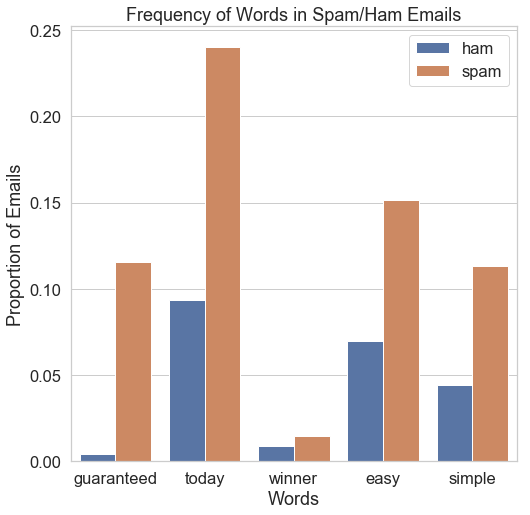

In [105]:
plt.figure(figsize = (8, 8))
sns.barplot(x = 'variable', y = 'value', hue = 'spam', data = dat, ci = None)
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
L = plt.legend()
L.get_texts()[0].set_text('ham')
L.get_texts()[1].set_text('spam')
plt.title('Frequency of Words in Spam/Ham Emails')
plt.show()

## Feature Engineering

In [6]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.array([[word in text for word in words] for text in texts])
    return indicator_array

In [86]:
def feature_matrix(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.array([[(word in text) & (len(text) < 22000) for word in words] for text in texts])
    return indicator_array

In [80]:
from sklearn.linear_model import LogisticRegression

In [139]:
phi_train = feature_matrix(word_list, train['email'])
phi_test = feature_matrix(word_list, val['email'])

y_train = train['spam']

model = LogisticRegression().fit(phi_train, y_train)
training_accuracy = sum(model.predict(phi_test) == val['spam']) / len(val['spam'])
training_accuracy

0.7532934131736527

In [157]:
testemail = ["hello jeff you a winner!! simply click here to be guaranteed a cakepop"]

In [158]:
feature_matrix(word_list, testemail)

array([[ True, False,  True, False, False]])

In [159]:
model.predict(feature_matrix(word_list, testemail))

array([1])

In [127]:
# CHANGE ME (Currently making random predictions)
phi_test = feature_matrix(word_list, test['email'])
test_predictions = model.predict(phi_test)

In [122]:
len(test['email'][0])

11703

In [121]:
# CHANGE ME (Currently making random predictions)
phi_test = feature_matrix(word_list, test['email'])
test_predictions = model.predict(phi_test)
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

## Calculating Performance Metrics

In [94]:
y_predict = model.predict(Phi_train)
tp = len(y_predict[(y_predict == 1) & (Y_train == 1)])
tn = len(y_predict[(y_predict == 0) & (Y_train == 0)])
fp = len(y_predict[(y_predict == 1) & (Y_train == 0)])
fn = len(y_predict[(y_predict == 0) & (Y_train == 1)])

logistic_predictor_precision = tp / (tp + fp)
logistic_predictor_recall = tp / (tp + fn)
logistic_predictor_far = fp / (fp + tn)

print(logistic_predictor_precision)
print(logistic_predictor_recall)
print(logistic_predictor_far)

0.6660899653979239
0.20327349524815205
0.03434774870973483


In [106]:
phi_test = feature_matrix(word_list, test['email'])
test_predictions = model.predict(phi_test)